In [1]:
import soundfile as sf
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

# Musk
# yt-dlp --extract-audio --audio-format wav XqJKAnN0-gM

# Bethoven
# yt-dlp --extract-audio --audio-format wav wfF0zHeU3Zs

# raw_data, sample_rate = sf.read('XqJKAnN0-gM.wav')
raw_data, sample_rate = sf.read('wfF0zHeU3Zs.wav')

(8400423, 2) 48000 175.0088125


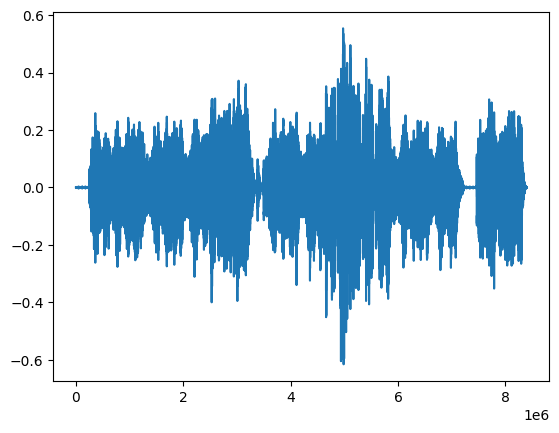

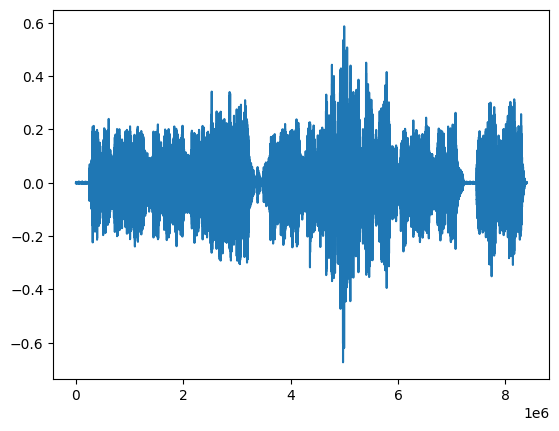

In [2]:
print(raw_data.shape, sample_rate, raw_data.shape[0] / sample_rate)
plt.plot(raw_data[:, 0])
plt.show()
plt.plot(raw_data[:, 1])
plt.show()

In [3]:
if len(raw_data.shape) > 1:
    raw_data = raw_data[:, 0]

In [4]:
raw_data = raw_data[sample_rate * 30 : sample_rate * 60]

In [5]:
print(raw_data.shape)

(1440000,)


50ms window: 24000


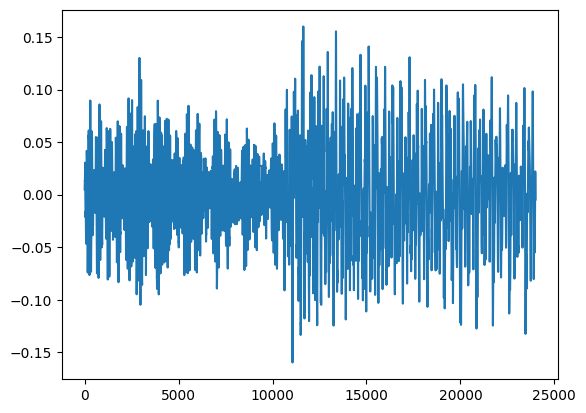

In [6]:
window_time = 0.5
window_size = int(window_time*sample_rate)
print('50ms window: {}'.format(window_size))
plt.plot(raw_data[8 * window_size : 9 * window_size])
plt.show()

0: 2.180
1: 2.133
2: 3.241
3: 2.707
4: 5.540
5: 3.649
6: 11.204
7: 4.943
8: 4.162
9: 5.279
10: 4.142
11: 0.945
12: 1.585
13: 0.611
14: 1.561
15: 2.980
16: 1.350
17: 3.806
18: 3.568
19: 2.326
20: 2.628
21: 1.688
22: 2.715
23: 4.533
24: 3.395
25: 4.444
26: 4.312
27: 4.156
28: 4.327
29: 1.755
30: 4.625
31: 1.580
32: 13.053
33: 4.473
34: 5.387
35: 9.240
36: 1.820
37: 4.279
38: 22.314
39: 12.020
40: 9.828
41: 4.941
42: 6.923
43: 5.467
44: 13.726
45: 7.553
46: 7.463
47: 13.468
48: 13.003
49: 30.951
50: 18.943
51: 33.932
52: 28.847
53: 25.140
54: 45.815
55: 140.009
56: 146.308
57: 36.787
58: 20.505
59: 13.059
60: 19.851
61: 25.444
62: 30.359
63: 5.848
64: 9.878
65: 11.133
66: 6.154
67: 13.623
68: 8.393
69: 7.120


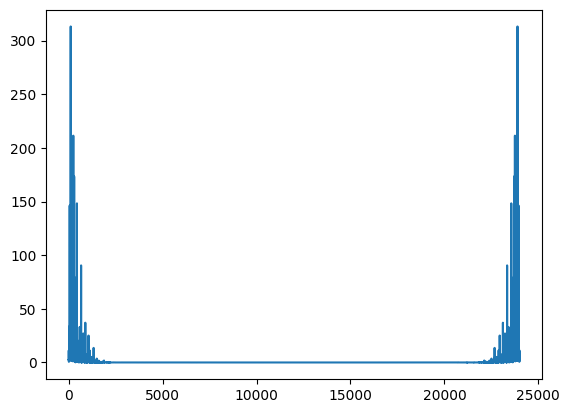

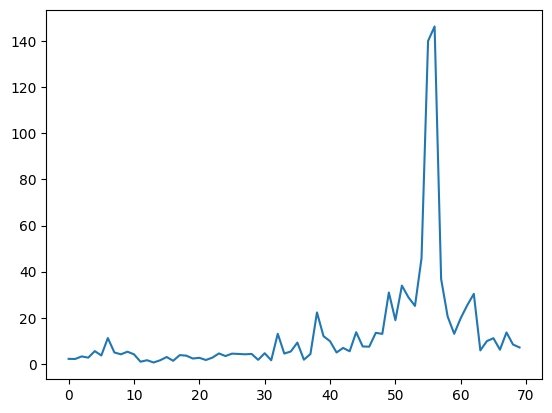

In [7]:
amp = np.fft.fft(raw_data[8 * window_size : 9 * window_size])
#print(list(amp[:25]))
amp = list(map(lambda x: abs(x), amp))
for i in range(70):
    print('{}: {:.3f}'.format(i, amp[i]))
plt.plot(amp)
plt.show()
plt.plot(amp[:70])
plt.show()

In [8]:
print(np.argmax(amp[:len(amp) // 2])/window_time)

220.0


In [9]:
mains = []
for i in range(raw_data.shape[0] // window_size):
    amp = np.fft.fft(raw_data[i * window_size : (i + 1) * window_size])
    amp = list(map(lambda x: abs(x), amp[:len(amp) // 2]))
    mains.append(np.argmax(amp) / window_time)
print(mains)

[220.0, 220.0, 496.0, 416.0, 220.0, 220.0, 220.0, 496.0, 220.0, 220.0, 496.0, 166.0, 496.0, 220.0, 496.0, 262.0, 392.0, 196.0, 248.0, 220.0, 220.0, 496.0, 660.0, 330.0, 1322.0, 624.0, 624.0, 624.0, 624.0, 496.0, 220.0, 220.0, 496.0, 416.0, 220.0, 220.0, 626.0, 496.0, 220.0, 220.0, 496.0, 416.0, 496.0, 110.0, 330.0, 350.0, 174.0, 220.0, 348.0, 174.0, 884.0, 882.0, 392.0, 466.0, 468.0, 466.0, 220.0, 262.0, 220.0, 588.0]
